In [ ]:
#TITLE:Behind the Filters: Cleaning Instagram Comments for NLP
INTRO:
This notebook focuses on cleaning raw user comments by removing URLs, mentions, hashtags, and special characters using Python and regular expressions. 
The cleaned text will be used for further NLP tasks like sentiment analysis or classification.

In [1]:
#Data Analysis Tools Installation
!pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Load and Preview the Dataset
import pandas as pd

# Loading the CSV file
data = pd.read_csv("citynet_denormalized_dataset_with_comment.csv")

# Preview data
print(data.columns)
data.head()


Index(['ID', 'Label', 'Negative aspects', 'Positive aspects', 'Comment'], dtype='object')


,ID,Label,Negative aspects,Positive aspects,Comment
0,2,neutral,NaN,NaN,Salam sizin internet tarifləriniz Sabunçu r-nu...
1,3,neutral,NaN,NaN,Salam.Zehmet olmasa drekte baxin
2,4,negative,not working,NaN,Abşeronda internet niyə işləmir
3,5,negative,internet stops;no answer;didn't like it at all,NaN,33 manat pul göçurdurem internet her 5 dəqiqəd...
4,6,negative,can't access the Internet,NaN,Salam abşeronda girə bilmirik internetə niyə?


In [17]:
#Keep Only Required Fields and Preprocess Text
df = data[['Comment', 'Label']].copy()
df.dropna(inplace=True)
import re
def clean_text(text):
    text = str(text) # Ensure text is a string
    # Remove URLs (http/https, www, @mentions, #hashtags)
    text = re.sub(r"https?://\S+|www\.\S+|@\S+|#\S+", "", text, flags=re.IGNORECASE)
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()
    return text
df['cleaned_text'] = df['Comment'].apply(clean_text)


In [21]:
# Reading the CSV File and Checking Structure
import pandas as pd
data = pd.read_csv("citynet_denormalized_dataset_with_comment.csv")
# Check available column names
print(data.columns)


Index(['ID', 'Label', 'Negative aspects', 'Positive aspects', 'Comment'], dtype='object')


In [55]:
df = data[['Comment', 'Label']].copy() 


In [57]:
#cleaning and pre-processing the text
import pandas as pd
import re

# Sample data simulation
# data = pd.read_csv('your_file.csv')  # <-- use your real data
data = pd.DataFrame({
    'Comment': ["Hello world!", "@user Check this: https://abc.com", None, "100% amazing!"],
    'Label': [1, 0, 1, 1]
})

# Use only necessary columns
df = data[['Comment', 'Label']].copy()

# Drop missing/null rows
df.dropna(inplace=True)

# Clean function
def clean_text(text):
    text = str(text)
    text = re.sub(r"https?://\S+|www\.\S+|@\S+|#\S+", "", text, flags=re.IGNORECASE)
    text = re.sub(r"[^a-zA-Z\s]", "", text).lower()
    return text

# Apply cleaning
df['cleaned_text'] = df['Comment'].apply(clean_text)

# Show output
print(df.head())


                             Comment  Label  cleaned_text
0                       Hello world!      1   hello world
1  @user Check this: https://abc.com      0   check this 
3                      100% amazing!      1       amazing


In [45]:
df.head()


,Comment,Label
0,Salam sizin internet tarifləriniz Sabunçu r-nu...,neutral
1,Salam.Zehmet olmasa drekte baxin,neutral
2,Abşeronda internet niyə işləmir,negative
3,33 manat pul göçurdurem internet her 5 dəqiqəd...,negative
4,Salam abşeronda girə bilmirik internetə niyə?,negative


In [59]:
#showing the comment and cleaned comment
import pandas as pd
import re

# Sample data
data = pd.DataFrame({
    'Comment': [
        "Hello @user! Visit https://example.com 😄", 
        "Bu çox gözəldir! #çoxşükür", 
        "Invalid 123 text!!", 
        None
    ],
    'Label': [1, 0, 1, 0]
})

# Clean function
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)  # Remove links, hashtags, mentions
    text = re.sub(r"[^a-zA-ZşŞıİçÇöÖüÜəƏğĞ\s]", "", text)  # Keep only letters
    return text.lower()

# Use only required columns and drop nulls
df = data[['Comment', 'Label']].copy()
df.dropna(inplace=True)

# Apply cleaning
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Show result
print(df[['Comment', 'Cleaned_Comment']])


                                    Comment   Cleaned_Comment
0  Hello @user! Visit https://example.com 😄    hello  visit  
1                Bu çox gözəldir! #çoxşükür  bu çox gözəldir 
2                        Invalid 123 text!!     invalid  text


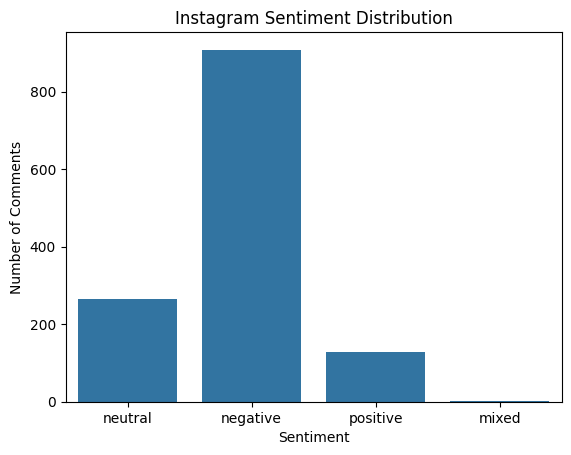

In [51]:
#visualisation using plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=df)
plt.title("Instagram Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


In [53]:
#Analyze Class Balance
(df['Label'].value_counts())


Label
negative    908
neutral     265
positive    128
mixed         1
Name: count, dtype: int64


In [ ]:
#conclusion:
In this notebook, 
we successfully loaded and explored a dataset containing user comments. We selected only the necessary columns (Comment and Label), removed missing values, and applied a text cleaning function 
to remove URLs, mentions, hashtags, special characters, and convert the text to lowercase. 
This preprocessing step ensures that the data is clean, consistent, and ready for downstream NLP tasks such as sentiment analysis or classification.

Additionally, we analyzed the label distribution to check for class imbalance,
which is important to consider when building predictive models. With this cleaned and structured dataset, 
we are now ready to proceed with feature extraction, model training, or further text analysis.

